In [1]:
import pandas as pd
import numpy  as np
import numpy.ma as ma

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

In [2]:
co2_gdp = pd.read_csv('C:/Users/Pichau/Desktop/Python/Capstone/co2-emissions-vs-gdp.csv')
co2_fuel = pd.read_csv('C:/Users/Pichau/Desktop/Python/Capstone/co2-emissions-by-fuel-line.csv')

In [3]:
co2_gdp.head()

,Entity,Code,Year,Annual CO2 emissions (per capita),GDP per capita,145446-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1949,0.0019,NaN,NaN,7624058.0,NaN
2,Afghanistan,AFG,1950,0.0109,1156.0,NaN,7752117.0,NaN
3,Afghanistan,AFG,1951,0.0117,1170.0,NaN,7840151.0,NaN
4,Afghanistan,AFG,1952,0.0115,1189.0,NaN,7935996.0,NaN


In [4]:
co2_fuel.head()

,Entity,Code,Year,Annual CO2 emissions from oil,Annual CO2 emissions from flaring,Annual CO2 emissions from cement,Annual CO2 emissions from coal,Annual CO2 emissions from gas,Annual CO2 emissions from other industry
0,Afghanistan,AFG,1950,63204.0,NaN,NaN,21068.0,NaN,NaN
1,Afghanistan,AFG,1951,65952.0,NaN,NaN,25648.0,NaN,NaN
2,Afghanistan,AFG,1952,59892.0,NaN,NaN,31708.0,NaN,NaN
3,Afghanistan,AFG,1953,68307.0,NaN,NaN,37949.0,NaN,NaN
4,Afghanistan,AFG,1954,63754.0,NaN,NaN,42502.0,NaN,NaN


In [5]:
co2_gdp.drop(['145446-annotations', 'Code','Continent'], axis='columns', inplace= True)
co2_fuel.drop('Code', axis = 1, inplace= True)

In [6]:
co2_emission = pd.merge(co2_gdp,co2_fuel,on= ["Entity", "Year"], how="inner")

In [7]:
co2_emission.rename(columns ={'Entity': 'entidade', 'Year': 'ano', 'Annual CO2 emissions from oil': 'anual_oil',
                             'Annual CO2 emissions from flaring': 'anual_flaring',
                             'Annual CO2 emissions from cement': 'anual_cement',
                             'Annual CO2 emissions from coal': 'anual_coal',
                             'Annual CO2 emissions from gas': 'anual_gas',
                             'Annual CO2 emissions from other industry': 'anual_outros',
                             'Annual CO2 emissions (per capita)': 'emissão_percapita',
                             'GDP per capita': 'gdp_percapita',
                             'Population (historical estimates)': 'população_estimada'}, inplace= True)


In [8]:
co2_emission.set_index(['entidade'], inplace=True, drop= True)

In [9]:
co2_emission.drop(['Africa', 'Oceania', 'North America', 'South America',
                  'Europe', 'EU-27', 'EU-28', 'World', 'Asia', 'Asia (excl. China & India)',
                  'Europe (excl. EU-27)', 'Europe (excl. EU-28)', 'North America (excl. USA)',
                  'Reunion' ], axis = 0, inplace = True)

In [10]:
co2_emission.corr()

,ano,emissão_percapita,gdp_percapita,população_estimada,anual_oil,anual_flaring,anual_cement,anual_coal,anual_gas,anual_outros
ano,1.000000,0.097488,0.325940,0.052718,0.105225,-0.073864,0.101008,0.089682,0.141141,-0.015892
emissão_percapita,0.097488,1.000000,0.672679,-0.012881,0.075134,0.129458,0.051915,0.248361,0.190239,-0.062187
gdp_percapita,0.325940,0.672679,1.000000,-0.012442,0.267754,-0.003714,0.048515,0.123281,0.232004,-0.203899
população_estimada,0.052718,-0.012881,-0.012442,1.000000,0.412958,0.142091,0.640293,0.667644,0.250427,0.919064
anual_oil,0.105225,0.075134,0.267754,0.412958,1.000000,0.417069,0.406672,0.642983,0.893007,0.441389
anual_flaring,-0.073864,0.129458,-0.003714,0.142091,0.417069,1.000000,0.249813,0.398322,0.508734,0.629446
anual_cement,0.101008,0.051915,0.048515,0.640293,0.406672,0.249813,1.000000,0.889432,0.233823,0.927408
anual_coal,0.089682,0.248361,0.123281,0.667644,0.642983,0.398322,0.889432,1.000000,0.468245,0.919662
anual_gas,0.141141,0.190239,0.232004,0.250427,0.893007,0.508734,0.233823,0.468245,1.000000,0.295160
anual_outros,-0.015892,-0.062187,-0.203899,0.919064,0.441389,0.629446,0.927408,0.919662,0.295160,1.000000


In [11]:
#plt.plot(co2_emission['ano'].loc['Brazil'], co2_emission['emissão_percapita'].loc['Brazil'])
#plt.plot(co2_emission['ano'].loc['Brazil'], co2_emission['gdp_percapita'].loc['Brazil'], label = 'Brasil')

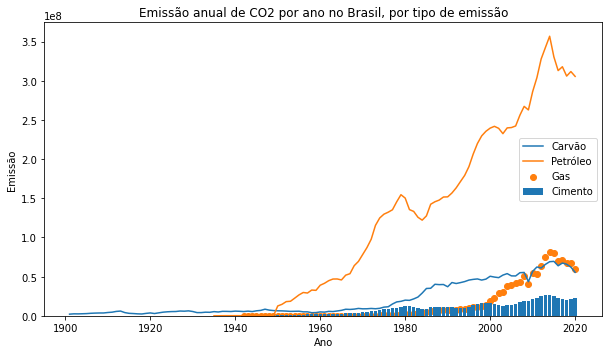

In [12]:
fig, ax = plt.subplots(figsize=(10,5.4))
ax.bar(co2_emission['ano'].loc['Brazil'], co2_emission['anual_cement'].loc['Brazil'], label ='Cimento' )
ax.scatter(co2_emission['ano'].loc['Brazil'], co2_emission['anual_gas'].loc['Brazil'], label ='Gas')
ax.plot(co2_emission['ano'].loc['Brazil'], co2_emission['anual_coal'].loc['Brazil'], label ='Carvão')
ax.plot(co2_emission['ano'].loc['Brazil'], co2_emission['anual_oil'].loc['Brazil'], label ='Petróleo')
ax.set_xlabel('Ano')
ax.set_ylabel('Emissão')
ax.set_title('Emissão anual de CO2 por ano no Brasil, por tipo de emissão')
ax.legend()

In [13]:
X = (co2_emission['ano']).fillna(0)
Y = (co2_emission['gdp_percapita']).fillna(0)
Z = (co2_emission['emissão_percapita']).fillna(0)

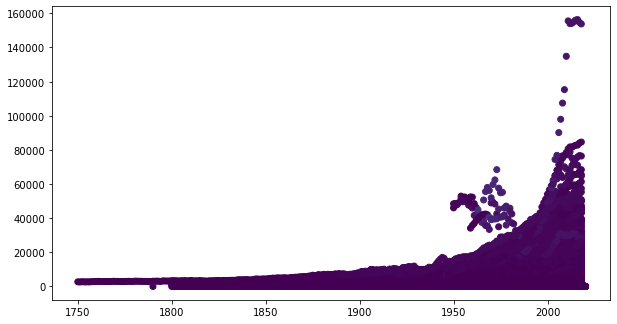

In [14]:
fig, asx = plt.subplots(figsize=(10,5.4))
asx.scatter(X, Y, c= Z, cmap='viridis')



In [15]:
co2_emission.describe()

,ano,emissão_percapita,gdp_percapita,população_estimada,anual_oil,anual_flaring,anual_cement,anual_coal,anual_gas,anual_outros
count,20798.000000,20703.000000,13749.000000,2.075200e+04,1.819100e+04,3.576000e+03,1.085200e+04,1.434700e+04,7.438000e+03,1.511000e+03
mean,1960.816377,4.265358,8546.202944,2.295038e+07,3.021869e+07,4.968101e+06,3.977056e+06,5.494133e+07,3.297013e+07,6.190042e+06
std,46.323954,15.764054,11432.078671,8.997843e+07,1.481827e+08,9.662321e+06,2.846954e+07,2.899478e+08,1.219842e+08,1.826947e+07
min,1750.000000,0.000100,295.000000,1.490000e+03,3.600000e+01,4.000000e+00,1.710000e+02,5.000000e+00,1.100000e+01,4.600000e+01
25%,1937.000000,0.234000,1949.000000,1.208612e+06,2.784640e+05,1.650398e+05,1.126630e+05,2.125120e+05,2.601440e+05,5.074570e+05
50%,1971.000000,1.165000,4339.000000,4.592474e+06,1.755056e+06,1.143285e+06,4.494920e+05,2.293945e+06,2.806160e+06,1.255637e+06
75%,1996.750000,4.657200,9966.000000,1.418572e+07,1.096745e+07,4.592083e+06,1.860688e+06,1.563140e+07,1.753042e+07,4.262244e+06
max,2020.000000,748.639300,156299.000000,1.439324e+09,2.608477e+09,8.450972e+07,8.582326e+08,7.493454e+09,1.694894e+09,1.772568e+08


In [16]:
co2_emission_2018 = co2_emission.loc[co2_emission['ano'] == 2018]

<AxesSubplot:xlabel='entidade'>

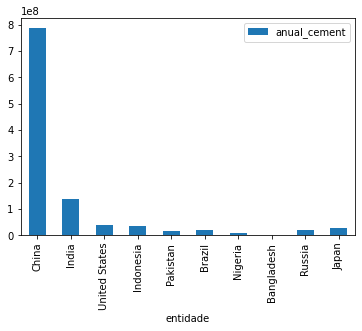

In [17]:
co2_emission_2018.nlargest(10, 'população_estimada').plot(y='anual_cement', use_index=True, kind = 'bar')

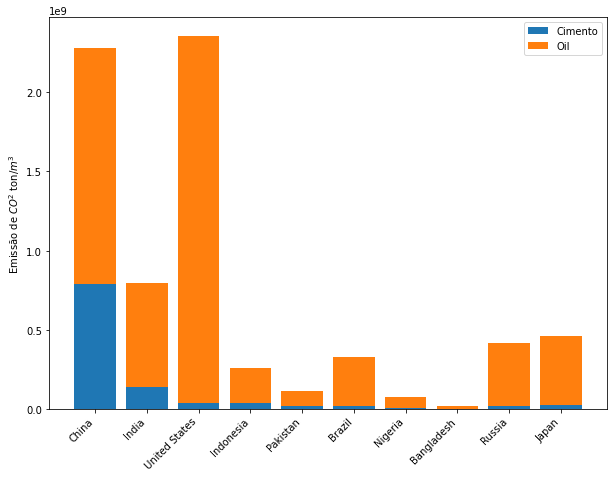

In [18]:
fig, axy = plt.subplots( figsize=(10,8))
fig.autofmt_xdate(rotation=45)
axy.bar(co2_emission_2018.nlargest(10, 'população_estimada').index, co2_emission_2018.nlargest(10, 'população_estimada')['anual_cement'], label = 'Cimento')
axy.bar(co2_emission_2018.nlargest(10, 'população_estimada').index, co2_emission_2018.nlargest(10, 'população_estimada')['anual_oil'], 
        bottom = co2_emission_2018.nlargest(10, 'população_estimada')['anual_cement'], label = 'Oil' )

axy.set_ylabel(r"Emissão de $CO^2$ ton/$m^3$ ")

axy.legend()

In [19]:
tag1 = co2_emission_2018.nlargest(10, 'população_estimada').index # Maiores Populações
tag2 = co2_emission_2018.nlargest(10, 'gdp_percapita').index # Maiores GDPs per capita
co2_emission_2018['gdp'] =  co2_emission_2018['gdp_percapita'] * co2_emission_2018['população_estimada']
tag3 = co2_emission_2018.nlargest(10, 'gdp').index # Maiores GDPs

<ipython-input-19-9f67bc3aeb01>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_emission_2018['gdp'] =  co2_emission_2018['gdp_percapita'] * co2_emission_2018['população_estimada']


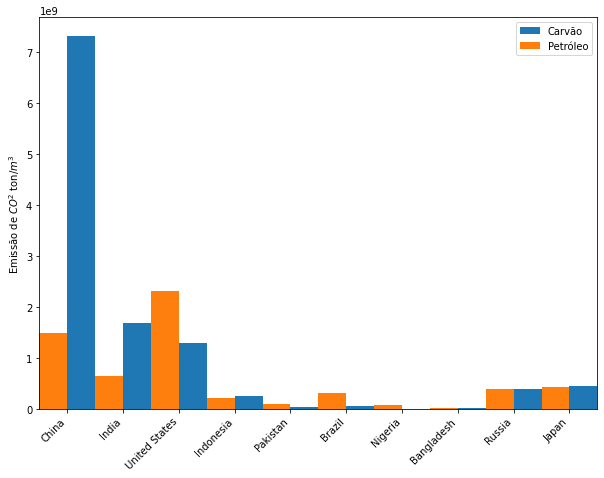

In [20]:
x = np.arange(len(tag1))
width =0.5
fig, axw = plt.subplots( figsize=(10,8))
fig.autofmt_xdate(rotation=45)
r2 = axw.bar( x + width/2, co2_emission_2018.nlargest(10, 'população_estimada')['anual_coal'], width, label = 'Carvão')
r4 = axw.bar( x - width/2 , co2_emission_2018.nlargest(10, 'população_estimada')['anual_oil'], width, label = 'Petróleo')
axw.set_ylabel(r"Emissão de $CO^2$ ton/$m^3$ ")
axw.set_xlim(-0.5, 9.5)
axw.set_xticks(x)
axw.set_xticklabels(tag1)
axw.legend()



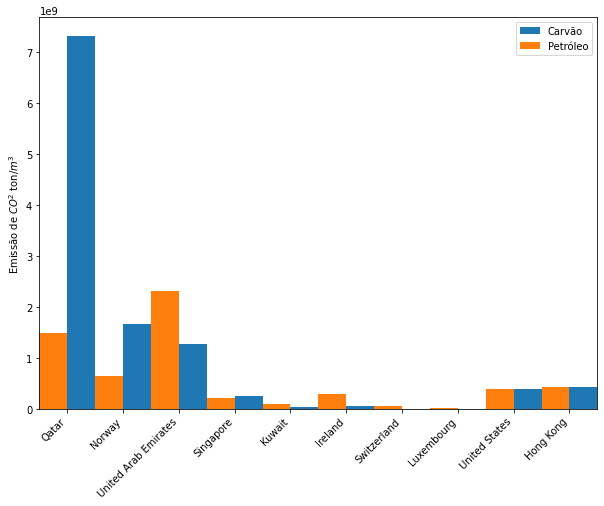

In [21]:
x = np.arange(len(tag2))
width =0.5
fig, axw = plt.subplots( figsize=(10,8))
fig.autofmt_xdate(rotation=45)
r2 = axw.bar( x + width/2, co2_emission_2018.nlargest(10, 'população_estimada')['anual_coal'], width, label = 'Carvão')
r4 = axw.bar( x - width/2 , co2_emission_2018.nlargest(10, 'população_estimada')['anual_oil'], width, label = 'Petróleo')
axw.set_ylabel(r"Emissão de $CO^2$ ton/$m^3$ ")
axw.set_xlim(-0.5, 9.5)
axw.set_xticks(x)
axw.set_xticklabels(tag2)
axw.legend()

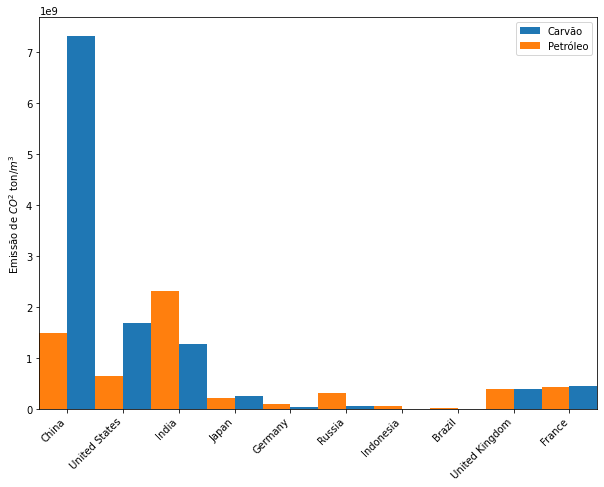

In [22]:
x = np.arange(len(tag3))
width =0.5
fig, axw = plt.subplots( figsize=(10,8))
fig.autofmt_xdate(rotation=45)
r2 = axw.bar( x + width/2, co2_emission_2018.nlargest(10, 'população_estimada')['anual_coal'], width, label = 'Carvão')
r4 = axw.bar( x - width/2 , co2_emission_2018.nlargest(10, 'população_estimada')['anual_oil'], width, label = 'Petróleo')
axw.set_ylabel(r"Emissão de $CO^2$ ton/$m^3$ ")
axw.set_xlim(-0.5, 9.5)
axw.set_xticks(x)
axw.set_xticklabels(tag3)
axw.legend()